# Motion blur metric idea
Idea is to find a simple metric which can descibe if an image is blured then maybe hold ratio of blurred images up to non blurred image much like brightness metric idea.


Many methods can be found as it is already a studied field. Methods such as fast fourier transform on a image then looking at the high and low frequency components can lead to making a difficult decision for where to place the thresholds of what constitutes a "high" amount of high frequency components etc. 

Having therefore searched for already existing algorithms/studies for different methods most of them looking at grayscale statistics. There is a different method: variation of the Laplacian [study](https://ieeexplore.ieee.org/document/903548) that will give us a singular value for each image to determine if an image is blurry.  

In [16]:
# Import statements
from imageio import imread, imwrite
from pylab import *
from skimage.util import img_as_ubyte, img_as_float
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from matplotlib.pyplot import imshow
from copy import copy
import seaborn as sns

In [2]:
# Routinely have to update this import so it is seperated from the other imports
import dataset_plotting as dp
import BP_ratio as bp
import motion_blur as mb

In [3]:
# Reading image:
maden= imread("Images/Maden.jpg")
# Load to grayscale:
maden_gs = bp.load_to_colorspace(maden,"GRAY")

In [4]:
# Use Laplacian with openCV
cv2.Laplacian(maden_gs, cv2.CV_64F).var()

348.3379409722221

Lower values indicate if an image is more "blurry" if wanting to classify an image as blurry or not blurry you would need a threshold to decide.

In [5]:
# Test for a bigger dataset here try E45 images which are of relatively low quality but still not very affected by blur.
import os
datapath = os.getcwd() + "/Images/E45/"
datalist = os.listdir(datapath)
res = []
for file in datalist:
    image = bp.load_to_colorspace(imread(os.path.join(datapath, file)), "GRAY")
    res.append(mb.motion_blur_laplacian(image))
res  

[834.4416817817582,
 893.6967465453677,
 834.6141177469465,
 768.2572175546857,
 882.8835218301986,
 846.2752818983288,
 858.156367929575,
 852.2598476435238,
 858.6192861053044,
 857.7424962612153,
 929.6288008656397,
 880.1105194701726,
 839.9297136026063,
 832.4628784205013]

In [6]:
# Try deploy on AQUALOC:
blurdata_aqualoc = mb.load_aqualoc_dataset()

Scanning next folder current total of images processed:  4586
Scanning next folder current total of images processed:  12728
Scanning next folder current total of images processed:  17879
Scanning next folder current total of images processed:  22004
Scanning next folder current total of images processed:  25462
Scanning next folder current total of images processed:  27999
Scanning next folder current total of images processed:  30260


In [7]:
# Print largest and smallest values in data:
print("Largest variance in laplacian: ", np.max(blurdata_aqualoc))
print("Smallest variance in laplacian: ", np.min(blurdata_aqualoc))

Largest variance in laplacian:  1455.501864603451
Smallest variance in laplacian:  22.85036114542745


In [20]:
q25, q75 = np.percentile(blurdata_aqualoc, [25, 75])
print(q25, q75)

53.89736477943836 196.42312355211243


<AxesSubplot:ylabel='Count'>

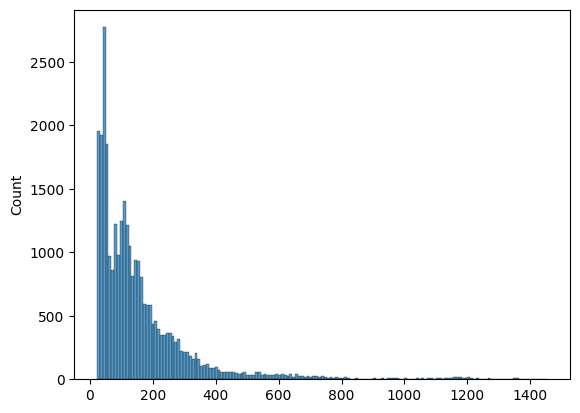

In [19]:
sns.histplot(blurdata_aqualoc, bins=dp.feedman_bins(blurdata_aqualoc))

In [8]:
# Try deploy on AQUALOC:
blurdata_euroc = mb.load_euroc_dataset()

Scanning next folder current total of images processed:  2033
Scanning next folder current total of images processed:  4065


In [9]:
# Print largest and smallest values in data:
print("Largest variance in laplacian: ", np.max(blurdata_euroc))
print("Smallest variance in laplacian: ", np.min(blurdata_euroc))

Largest variance in laplacian:  1422.4440262500034
Smallest variance in laplacian:  82.13280661034227


In [21]:
q25, q75 = np.percentile(blurdata_euroc, [25, 75])
print(q25, q75)

241.93854481374106 634.3971740928042


<AxesSubplot:ylabel='Count'>

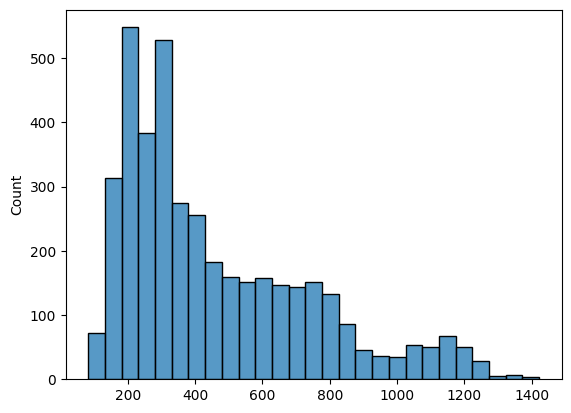

In [22]:
sns.histplot(blurdata_euroc, bins=dp.feedman_bins(blurdata_euroc))